### Anomaly Detection Toolkit (ADTK)
#### Check the documentation on https://adtk.readthedocs.io/en/stable/
#### A YouTube Video for tutorial on https://www.youtube.com/watch?v=T5wB7pk3CUc&list=LL&index=1&pp=gAQBiAQB

In [3]:
### Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

In [8]:
data = pd.read_csv("temperature.csv")
# data = data.set_index("Date")
# data = data["Mean"]
print(data)

       Source        Date    Mean
0        GCAG  2016-12-06  0.7895
1     GISTEMP  2016-12-06  0.8100
2        GCAG  2016-11-06  0.7504
3     GISTEMP  2016-11-06  0.9300
4        GCAG  2016-10-06  0.7292
...       ...         ...     ...
3283  GISTEMP  1880-03-06 -0.1800
3284     GCAG  1880-02-06 -0.1229
3285  GISTEMP  1880-02-06 -0.2100
3286     GCAG  1880-01-06  0.0009
3287  GISTEMP  1880-01-06 -0.3000

[3288 rows x 3 columns]


In [10]:
data = pd.read_csv("temperature.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
data = data["Mean"]
print(data)

Date
2016-12-06    0.7895
2016-12-06    0.8100
2016-11-06    0.7504
2016-11-06    0.9300
2016-10-06    0.7292
               ...  
1880-03-06   -0.1800
1880-02-06   -0.1229
1880-02-06   -0.2100
1880-01-06    0.0009
1880-01-06   -0.3000
Name: Mean, Length: 3288, dtype: float64


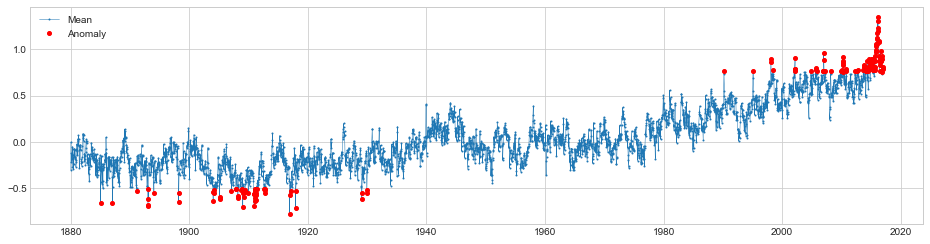

In [11]:
### Threshold detection
threshold_detector = ThresholdAD(low=-0.5, high=0.75)
anomalies = threshold_detector.detect(data)
plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

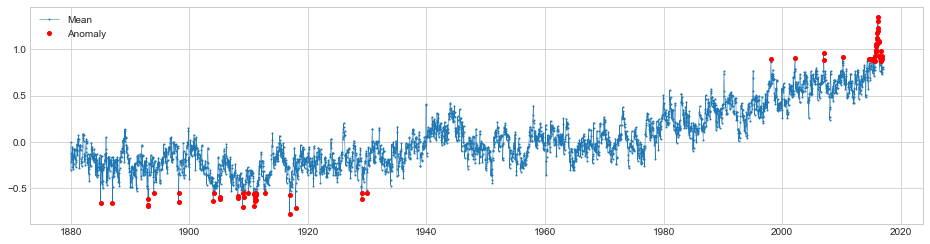

In [16]:
### Quantile detection - we need to train it first by using fit...
quantile_detector = QuantileAD(low=0.01, high=0.99)
anomalies = quantile_detector.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

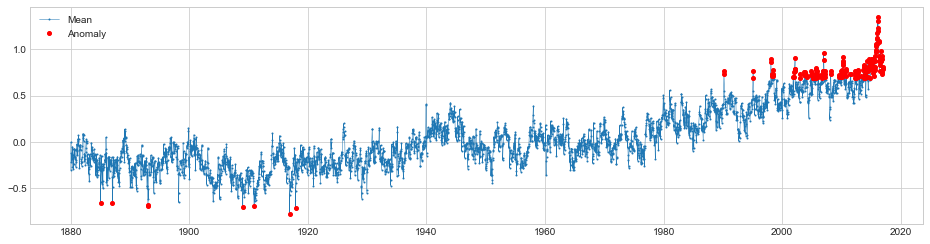

In [19]:
### 
iqr_detector = InterQuartileRangeAD(c=1.5)# The higher the C the less anomalies to find (1, 2,...)
anomalies = iqr_detector.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

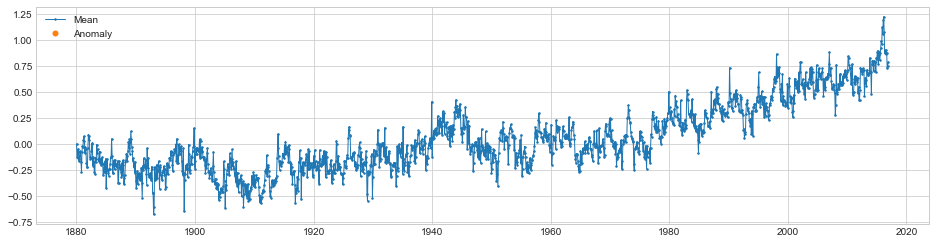

In [24]:
# This approach assumes the data is normally distributed
data_esd = validate_series(data)
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(data_esd)
plot(data_esd, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_tag="marker")
plt.show()
# No anomaly is found, may be because the data is not normally distributed

In [1]:
print("Ramadan Mubarak")

Ramadan Mubarak
